<a href="https://colab.research.google.com/github/pradul7/Loan-approval/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [205]:
df = pd.read_json("/content/drive/MyDrive/Copy of loan_approval_dataset.json")

In [206]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [207]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [208]:
df.dtypes

Id                    int64
Income                int64
Age                   int64
Experience            int64
Married/Single       object
House_Ownership      object
Car_Ownership        object
Profession           object
CITY                 object
STATE                object
CURRENT_JOB_YRS       int64
CURRENT_HOUSE_YRS     int64
Risk_Flag             int64
dtype: object

In [209]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [210]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [211]:
df.nunique()

Id                   252000
Income                41920
Age                      59
Experience               21
Married/Single            2
House_Ownership           3
Car_Ownership             2
Profession               51
CITY                    317
STATE                    29
CURRENT_JOB_YRS          15
CURRENT_HOUSE_YRS         5
Risk_Flag                 2
dtype: int64

<ipython-input-212-482dd389a7ea>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Flag',data=df,palette='Set1')


<Axes: xlabel='Risk_Flag', ylabel='count'>

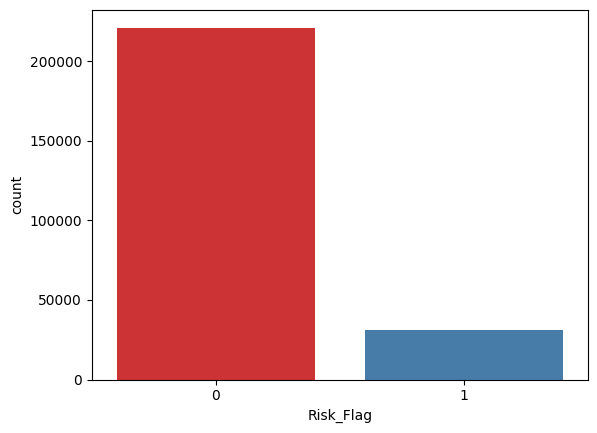

In [212]:
sns.countplot(x='Risk_Flag',data=df,palette='Set1')

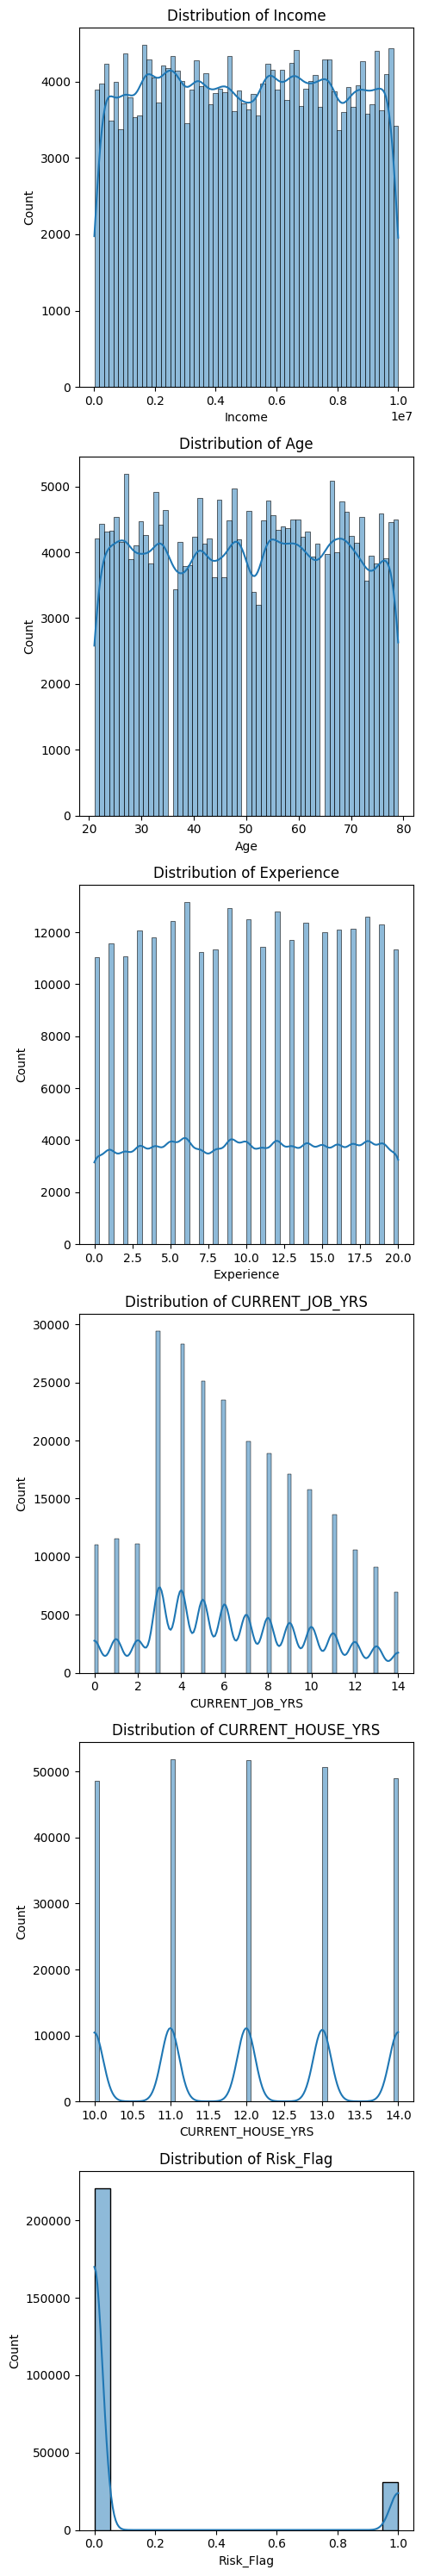

In [213]:
columns = ['Income','Age','Experience','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

fig, axs = plt.subplots(len(columns), figsize=(5, 5*len(columns)))

for i, col in enumerate(columns):
    sns.histplot(df[col], ax=axs[i],kde=True)
    axs[i].set_title('Distribution of ' + col)

plt.tight_layout()
plt.show()

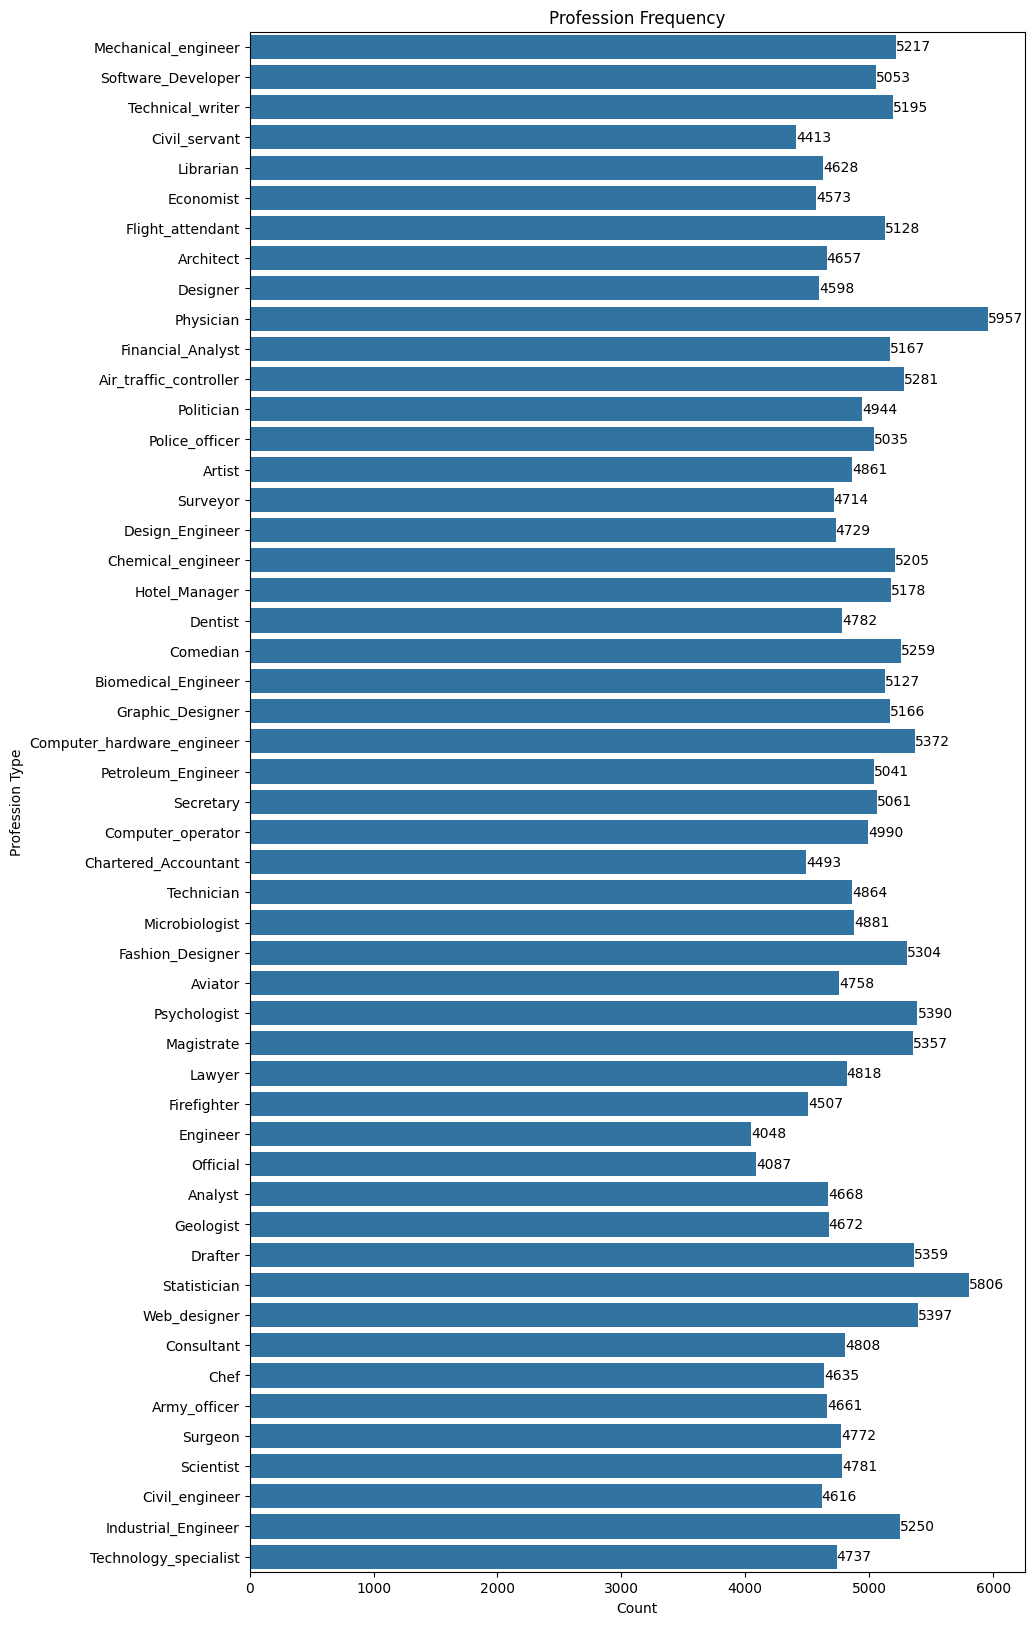

In [214]:
plt.figure(figsize=(10, 20))
ax = sns.countplot(y=df['Profession'])

plt.title("Profession Frequency")
plt.ylabel("Profession Type")
plt.xlabel("Count")

for container in ax.containers:
    ax.bar_label(container)
plt.show()


In [215]:
df.drop(['Id','CITY','STATE'],axis=1,inplace=True)

In [216]:
label_encode = LabelEncoder()

labels = ['Married/Single','House_Ownership','Car_Ownership']

for i in df.columns:
  if i in labels:
    df[i] = label_encode.fit_transform(df[i])


In [217]:
target_encode = TargetEncoder()

df['Profession'] = target_encode.fit_transform(df['Profession'],df['Income'])

In [218]:
df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,5.175032e+06,3,13,0
1,7574516,40,10,1,2,0,4.891296e+06,9,13,0
2,3991815,66,4,0,2,0,4.922266e+06,4,10,0
3,6256451,41,2,1,2,1,4.891296e+06,2,12,1
4,5768871,47,11,1,2,0,4.947843e+06,3,14,1


<Axes: >

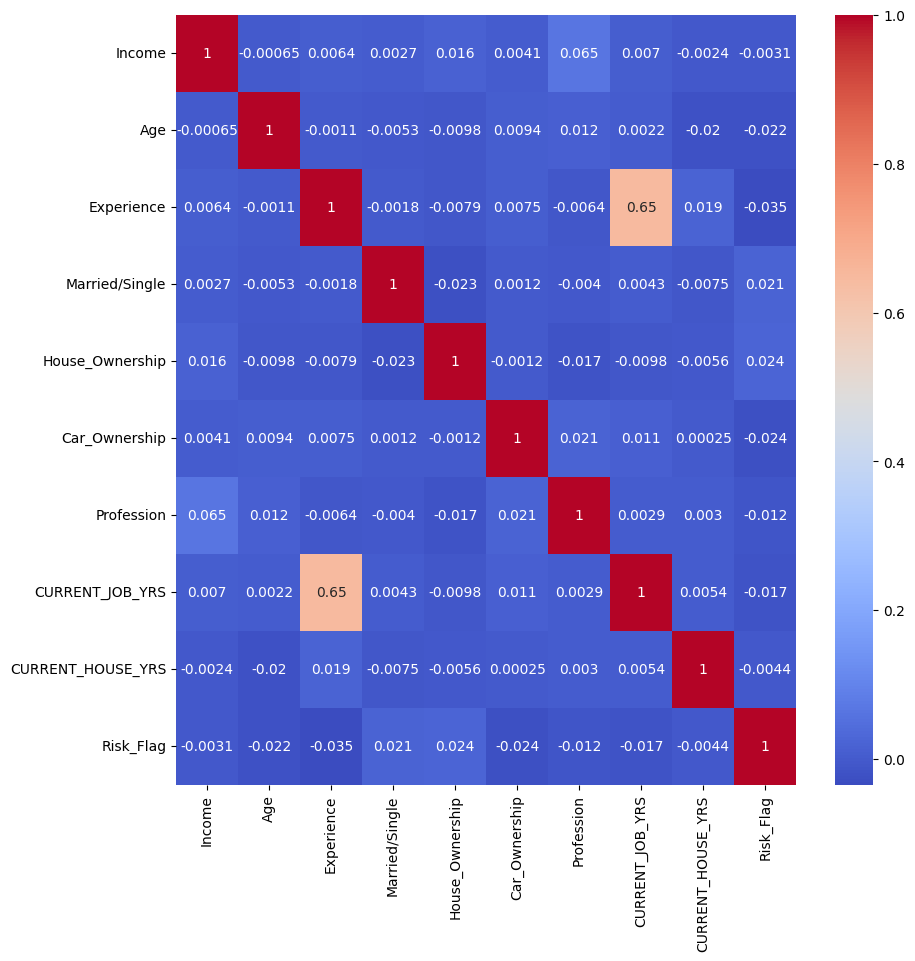

In [219]:
corr_matrix = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')

In [220]:
corr_matrix['Risk_Flag'].sort_values(ascending=False)

Risk_Flag            1.000000
House_Ownership      0.023622
Married/Single       0.021092
Income              -0.003091
CURRENT_HOUSE_YRS   -0.004375
Profession          -0.011887
CURRENT_JOB_YRS     -0.016942
Age                 -0.021809
Car_Ownership       -0.024036
Experience          -0.034523
Name: Risk_Flag, dtype: float64

In [221]:
x = df.drop(['Risk_Flag'],axis=1)

y = df['Risk_Flag']

In [222]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [223]:
norm = StandardScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.transform(x_test)

In [224]:
pca = PCA(n_components=4)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [225]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

Text(0.5, 1.0, 'Confusion Matrix')

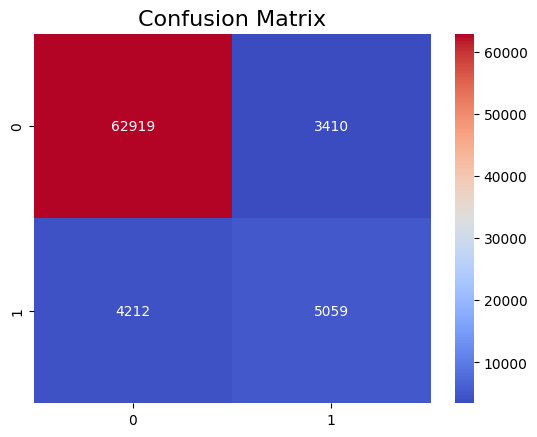

In [231]:
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.title('Confusion Matrix',size=16)

In [227]:
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.8991798941798942

In [228]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94     66329
           1       0.60      0.55      0.57      9271

    accuracy                           0.90     75600
   macro avg       0.77      0.75      0.76     75600
weighted avg       0.90      0.90      0.90     75600



After trying out various algorithms, I have got an accuracy score of 90.